In [2]:
from keras.datasets import boston_housing
import tensorflow as tf

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
train_data.shape


(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_targets
#目标是房屋价格的的中位数，单位是千美元

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

### 用于测试数据标准化的均值和标准差都是在训练数据上计算得到的，在工作流程中，<font color ='red'>你不能使用在测试数据上计算得到的任何结果</font>，即使是像数据标准化这么简单的事情。

In [10]:
from keras import models
from keras import layers

def build_model():
    #因为需要将同一个模型多次实例化，所以需要用一个函数来构建模型
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#metrics用于模型性能评估的函数,这些函数在模型编译时由metrics关键字设置
#它是预测值与目标值之差的绝对值。
#比如，如果这个问题的 MAE 等于 0.5，就表示你预测的房价与实际价格平均相差 500 美元。

### mse:最小二乘法
### mae:![Alt](https://img-blog.csdnimg.cn/20191025171433452.png#pic_center)
### rmse:![Alt](https://img-blog.csdnimg.cn/2019102517154112.png#pic_center)

In [13]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = [ ]

for i in range(k):
    print('procesing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model( )
    model.fit(partial_train_data,
             partial_train_targets,
             epochs = num_epochs,
             batch_size = 1,
             verbose=0)
    
#verbose：日志显示
#verbose = 0 为不在标准输出流输出日志信息
#verbose = 1 为输出进度条记录
#verbose = 2 为每个epoch输出一行记录
#注意： 默认为 1
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

procesing fold # 0








procesing fold # 1
procesing fold # 2
procesing fold # 3


In [14]:
all_scores

[2.3992934486653543, 2.1971678190892288, 2.965610992790449, 2.364133608813333]

In [16]:
np.mean(all_scores)

2.481551467339591

In [20]:
num_epochs = 500
all_mae_histories = [ ]
for i in range(k):
    print('processing fold #', i+1)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                       train_data[(i + 1) * num_val_samples:]],
                                      axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                       train_targets[(i + 1) * num_val_samples:]],
                                      axis=0)
    model = build_model( )
    history = model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              validation_data=(val_data, val_targets), verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [21]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [31]:
len(average_mae_history)
#横向取平均，将每次交叉验证集的第i个mae相加，取平均。

500

In [33]:
len(all_mae_histories[0])
#all_mae_histories[[500个mae],[500个mae],[500个mae],[500个mae]]

500

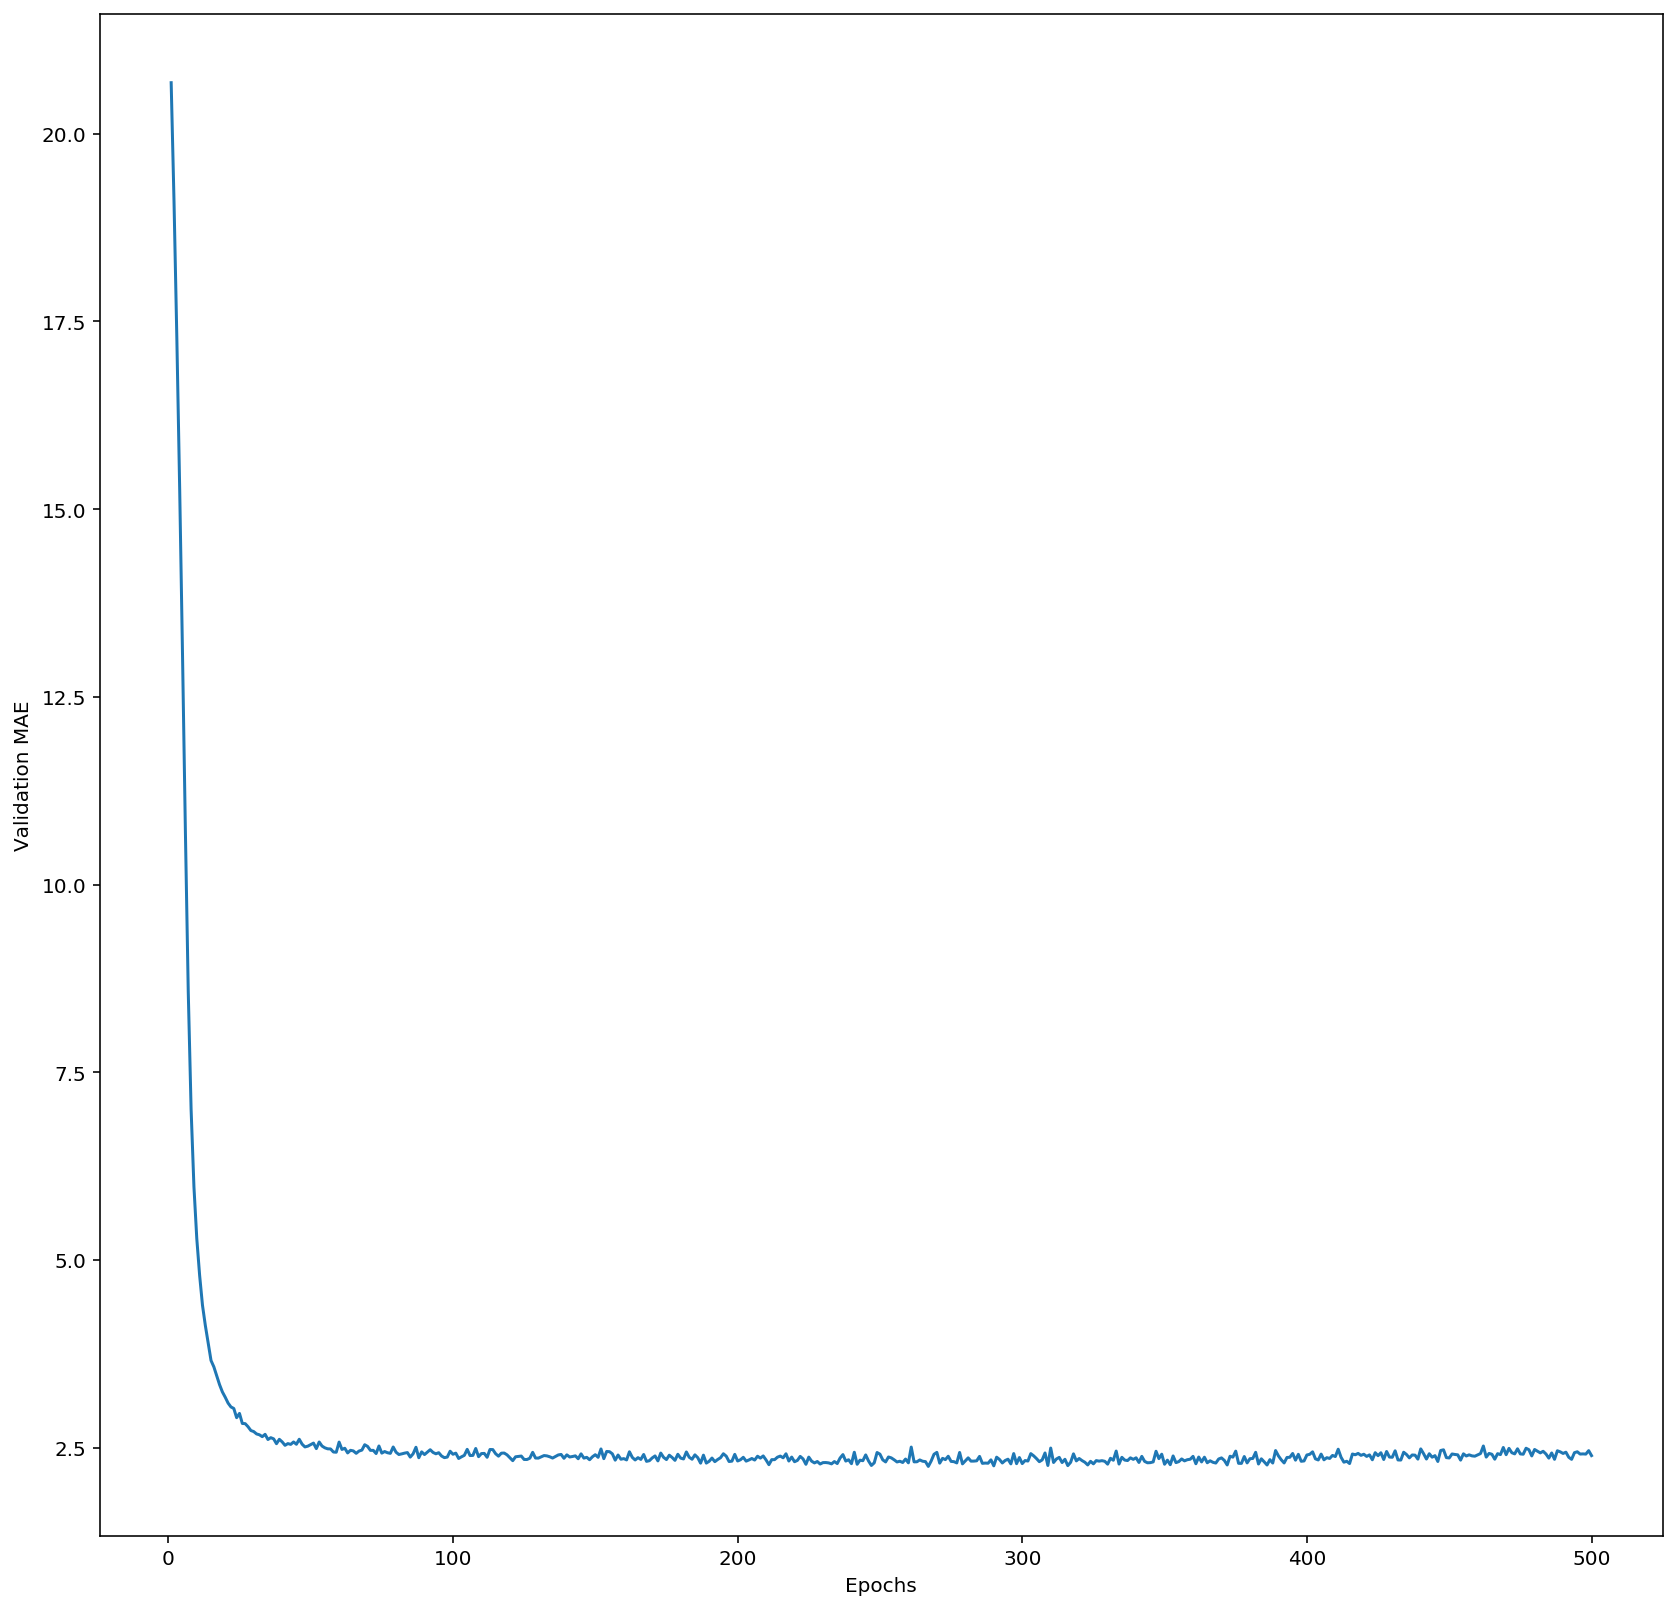

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig, ax = plt.subplots(figsize=(14, 14))
plt.plot(range(1, len(average_mae_history) + 1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show( )

## 移动指数平均值:滑动平均模型的原理就是一阶滞后滤波法
### <font color ='blue'>new_value=(1−a)×value+a×old_value</font>  
其中a的取值范围[0,1]，具体就是：本次滤波结果=(1-a)本次采样值+a上次滤波结果，采用此算法的目的是：   
1、降低周期性的干扰； 
2、在波动频率较高的场景有很好的效果。


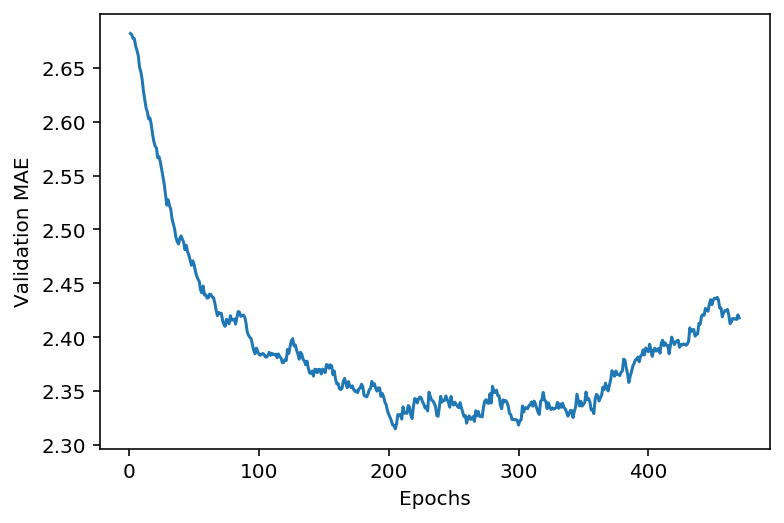

In [44]:
def smooth_curve(points, factor=0.9):
    
    smoothed_points = [ ]
    for point in points:
        if smoothed_points:# 这句话的意思是：smoothed_points不为空的话
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point *(1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[30:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.show( )

In [46]:
model = build_model( )
model.fit(train_data, train_targets, epochs=230, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [47]:
test_mae_score

2.3054338249505735

- 回归常用的损失函数是均方误差（MSE）。  
- 常见的回归指标是平均绝对误差（MAE）。  
- 如果输入数据的特征具有不同的取值范围，应该先进行预处理，对每个特征单独进行缩放。  
- 如果可用的数据很少，使用 K 折验证可以可靠地评估模型。  
- 如果可用的训练数据很少，最好使用隐藏层较少（通常只有一到两个）的小型网络，以避免严重的过拟合。  